In [456]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [457]:
#MOUNTING G DRIVE AND GIVING FULL ACCESS TO GOOGLE COLLAB SO THAT IT CAN ACCESS ALL FILES IN GOOGLE DRIVE
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [458]:
#GIVING FILE PATH SO THAT GOOGLE COLLAB CAN ACCESS THE FILE 
url ='/gdrive/MyDrive/ML CASE STUDY/Leads.csv'
lead_df = pd.read_csv(url)

In [459]:
#checking no of columns and no. of records
lead_df.shape

(9240, 37)

In [460]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [461]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [462]:
lead_df2=lead_df

In [463]:
#Dropping Prospect ID and Lead Number columns as they are just working as index
#There will no be any significance in output of prediciton of this two columns
lead_df=lead_df.drop(['Prospect ID','Lead Number'],axis=1)

In [464]:
lead_df.shape

(9240, 35)

In [465]:
lead_df.isna().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

1. From this description we can see there are lots of null values in feature
2. by this we can calculate percentage of null values in each column and further can decide to handle null values

In [466]:
round(100*(lead_df.isnull().sum()/len(lead_df.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

1. Here we can see there are some columns which are having more than 40% null values.
2. Even though we replaced null values it will create a biased significant to output variable.
3. Due to this inrealible significant is get created to output variable
4. so that it is better to drop this columns

In [467]:
lead_df=lead_df.drop(['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)

In [468]:
lead_df.shape

(9240, 30)

#Analysing each categorical Features

In [469]:
lead_df['Lead Origin'].unique()

array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Quick Add Form'], dtype=object)

<Figure size 1440x720 with 0 Axes>

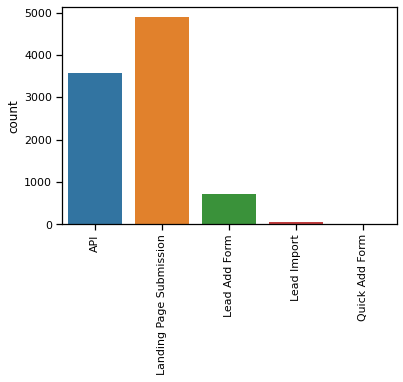

<Figure size 1440x720 with 0 Axes>

In [470]:
import seaborn as sns 
ax=sns.countplot(x=lead_df['Lead Origin'].values,data=lead_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure(figsize=(20,10))

From above graph we can see there is no missing value and null value in feature lead origin

In [471]:
lead_df['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

<Figure size 1440x720 with 0 Axes>

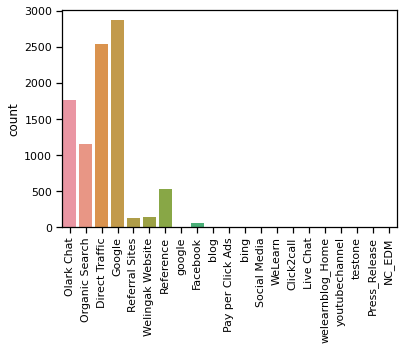

<Figure size 1440x720 with 0 Axes>

In [472]:
ax=sns.countplot(x=lead_df['Lead Source'].values,data=lead_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure(figsize=(20,10))

1. as per observation ther is null value present in feature
2. By graph we can see majority is of google so that we can replace gnull value with google

In [473]:
lead_df['Lead Source']=lead_df['Lead Source'].fillna('Google')

In [474]:
lead_df['Country'].unique()

array([nan, 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

<Figure size 1440x720 with 0 Axes>

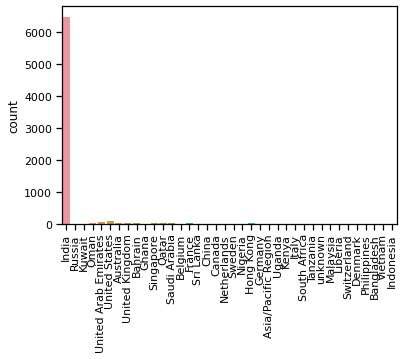

<Figure size 1440x720 with 0 Axes>

In [475]:
ax=sns.countplot(x=lead_df['Country'].values,data=lead_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure(figsize=(20,10))


1. From above graph we can conclude that there is null value in column country
2. we can replace null values with india beacuse, india has more occurance in feaure

In [476]:
lead_df['Country']=lead_df['Country'].fillna('India')

In [477]:
lead_df['Specialization'].unique()

array(['Select', 'Business Administration', 'Media and Advertising', nan,
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

<Figure size 1440x720 with 0 Axes>

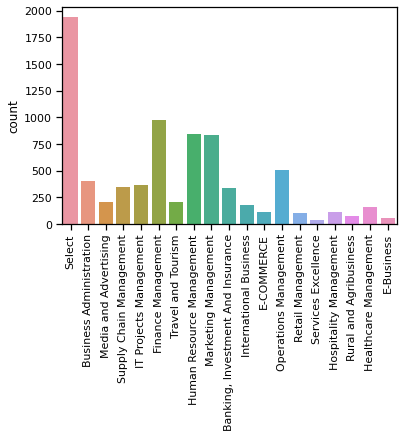

<Figure size 1440x720 with 0 Axes>

In [478]:
ax=sns.countplot(x=lead_df['Specialization'].values,data=lead_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure(figsize=(20,10))

1. As here it contais missing value first we converte the missing value to null value
2. and then we will convete null value to others category

In [479]:
lead_df['Specialization']=lead_df['Specialization'].replace('Select',np.nan)

In [480]:
lead_df['Specialization']=lead_df['Specialization'].fillna('Other')

<Figure size 1440x720 with 0 Axes>

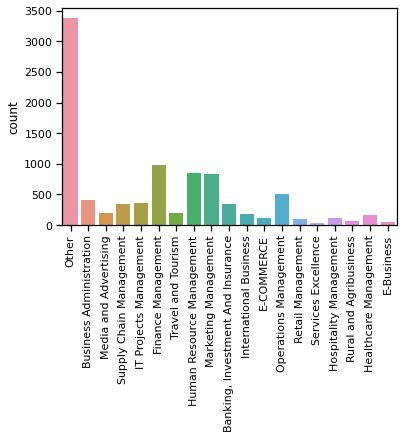

<Figure size 1440x720 with 0 Axes>

In [481]:
ax=sns.countplot(x=lead_df['Specialization'].values,data=lead_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure(figsize=(20,10))

In [482]:
lead_df['What is your current occupation'].unique()

array(['Unemployed', 'Student', nan, 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

<Figure size 1440x720 with 0 Axes>

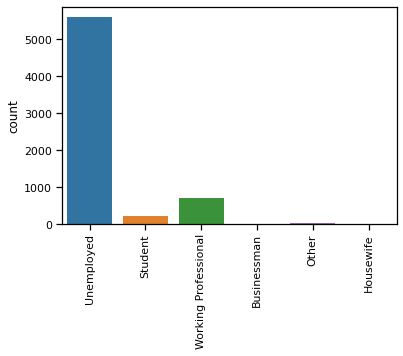

<Figure size 1440x720 with 0 Axes>

In [483]:
ax=sns.countplot(x=lead_df['What is your current occupation'].values,data=lead_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure(figsize=(20,10))

1. from graph it is clear that there is null value present in column
2. me can replace null value by the mode of that column

In [484]:
lead_df['What is your current occupation']=lead_df['What is your current occupation'].fillna(lead_df['What is your current occupation'].mode()[0])

In [485]:
lead_df['Do Not Email'].unique()

array(['No', 'Yes'], dtype=object)

<Figure size 1440x720 with 0 Axes>

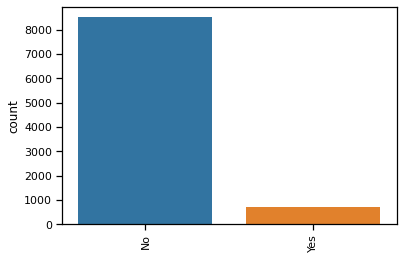

<Figure size 1440x720 with 0 Axes>

In [486]:
ax=sns.countplot(x=lead_df['Do Not Email'].values,data=lead_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure(figsize=(20,10))


1. There is no need for any replacement of values in Do not email feature

In [487]:
lead_df['Do Not Call'].unique()

array(['No', 'Yes'], dtype=object)

<Figure size 1440x720 with 0 Axes>

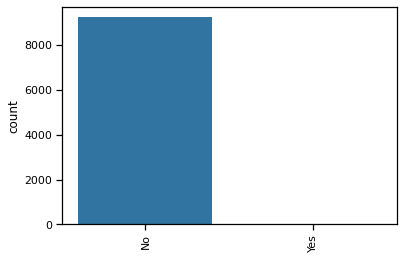

<Figure size 1440x720 with 0 Axes>

In [488]:
ax=sns.countplot(x=lead_df['Do Not Call'].values,data=lead_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure(figsize=(20,10))

1. There is no need for any replacement of values in Do not call feature

In [489]:
lead_df['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked', nan,
       'Approached upfront', 'SMS Sent', 'Visited Booth in Tradeshow',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

<Figure size 1440x720 with 0 Axes>

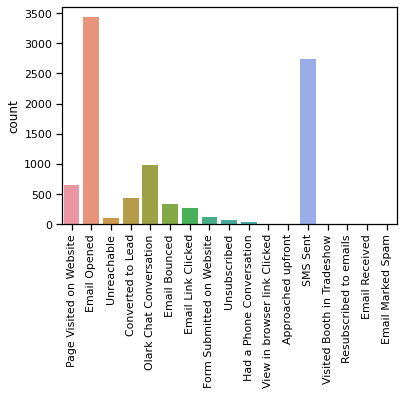

<Figure size 1440x720 with 0 Axes>

In [490]:
ax=sns.countplot(x=lead_df['Last Activity'].values,data=lead_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure(figsize=(20,10))

1. Here we can see there is null value we have to decide what should we use to replace null value
2. so that we have to calculate percentage and have to replaces it 

In [491]:
lead_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

1. From this it is clear that we can replaced nan values with mode of the  last activity

In [492]:
lead_df['Last Activity']=lead_df['Last Activity'].fillna(lead_df['Last Activity'].mode()[0])

In [493]:
lead_df['How did you hear about X Education'].unique()

array(['Select', 'Word Of Mouth', 'Other', nan, 'Online Search',
       'Multiple Sources', 'Advertisements', 'Student of SomeSchool',
       'Email', 'Social Media', 'SMS'], dtype=object)

1. Here we can see there is null value we need to replace it 
2. as well there is missing value called as Select, we have to replace it also

<Figure size 1440x720 with 0 Axes>

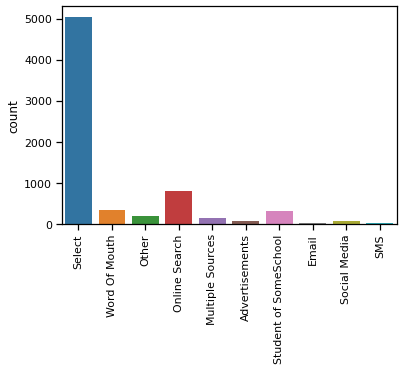

<Figure size 1440x720 with 0 Axes>

In [494]:
ax=sns.countplot(x=lead_df['How did you hear about X Education'].values,data=lead_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure(figsize=(20,10))

1. Here we can see there is category called as select which has higher counts
2. so we have to replaced select catogeory with null values

In [495]:
lead_df['How did you hear about X Education']=lead_df['How did you hear about X Education'].replace('Select',np.nan)

<Figure size 1440x720 with 0 Axes>

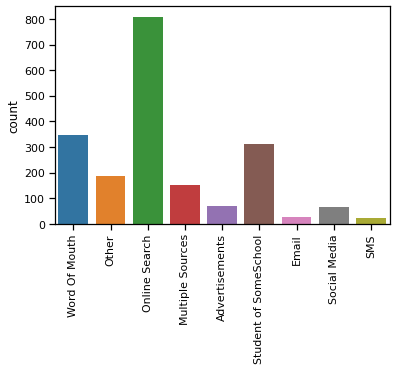

<Figure size 1440x720 with 0 Axes>

In [496]:
ax=sns.countplot(x=lead_df['How did you hear about X Education'].values,data=lead_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure(figsize=(20,10))

In [497]:
lead_df['What matters most to you in choosing a course'].unique()

array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

<Figure size 1440x720 with 0 Axes>

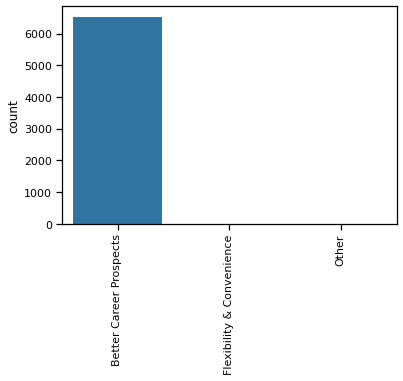

<Figure size 1440x720 with 0 Axes>

In [498]:
ax=sns.countplot(x=lead_df['What matters most to you in choosing a course'].values,data=lead_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure(figsize=(20,10))

1. From above figure and observation we can say that there is null value presetn in feature
2. as graph shpows there is majority of better career propectes
3. sso that we can replace null value with better career propectes

In [499]:
lead_df['What matters most to you in choosing a course']=lead_df['What matters most to you in choosing a course'].fillna('Better Career Prospects')

In [500]:
lead_df['Search'].unique()

array(['No', 'Yes'], dtype=object)

<Figure size 1440x720 with 0 Axes>

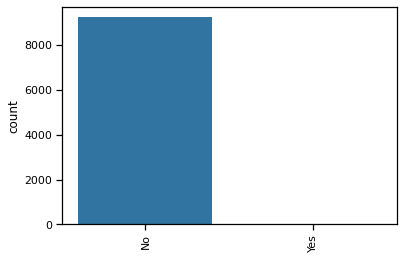

<Figure size 1440x720 with 0 Axes>

In [501]:
ax=sns.countplot(x=lead_df['Search'].values,data=lead_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure(figsize=(20,10))


1. There is not any missing value and null value in this feature

In [502]:
lead_df['Magazine'].unique()

array(['No'], dtype=object)

<Figure size 1440x720 with 0 Axes>

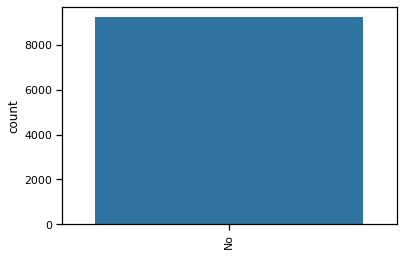

<Figure size 1440x720 with 0 Axes>

In [503]:
ax=sns.countplot(x=lead_df['Magazine'].values,data=lead_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure(figsize=(20,10))

1. There is not any missing value and null value in this feature

In [504]:
lead_df['Newspaper'].unique()

array(['No', 'Yes'], dtype=object)

<Figure size 1440x720 with 0 Axes>

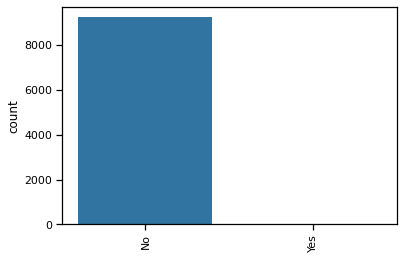

<Figure size 1440x720 with 0 Axes>

In [505]:
ax=sns.countplot(x=lead_df['Newspaper'].values,data=lead_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure(figsize=(20,10))


1. There is not any missing value and null value in this feature|

In [506]:
lead_df['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

<Figure size 1440x720 with 0 Axes>

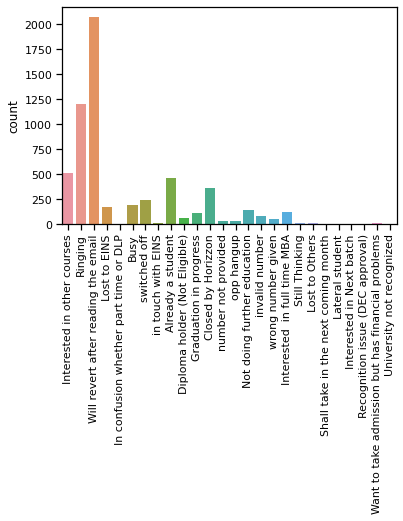

<Figure size 1440x720 with 0 Axes>

In [507]:
ax=sns.countplot(x=lead_df['Tags'].values,data=lead_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure(figsize=(20,10))

1. with the help of graph we have replace the null value in tag with mode of that column

In [508]:
lead_df['Tags']=lead_df['Tags'].fillna(lead_df['Tags'].mode()[0])

In [509]:
lead_df['Lead Profile'].unique()

array(['Select', 'Potential Lead', nan, 'Other Leads', 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'],
      dtype=object)

<Figure size 1440x720 with 0 Axes>

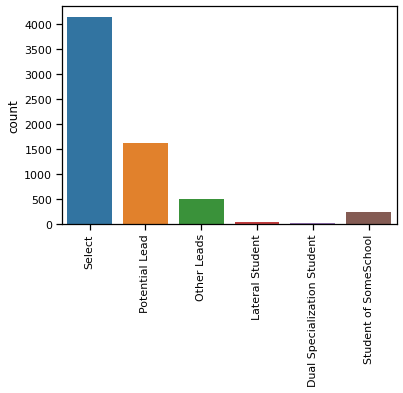

<Figure size 1440x720 with 0 Axes>

In [510]:
ax=sns.countplot(x=lead_df['Lead Profile'].values,data=lead_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure(figsize=(20,10))

1. we are replacing select with null beacuse we dont know the profile of them and canot placed any other category

In [511]:
lead_df['Lead Profile']=lead_df['Lead Profile'].replace('Select',np.nan)

In [512]:
lead_df['City'].unique()

array(['Select', 'Mumbai', nan, 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

<Figure size 1440x720 with 0 Axes>

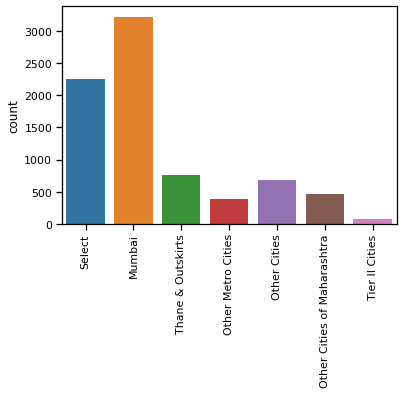

<Figure size 1440x720 with 0 Axes>

In [513]:
ax=sns.countplot(x=lead_df['City'].values,data=lead_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure(figsize=(20,10))

1. here we will replace missing value with null first
2. then will replace null value with mode of column

In [514]:
lead_df['City']=lead_df['City'].replace('Select',np.nan)

In [515]:
lead_df['City']=lead_df['City'].fillna(lead_df['City'].mode()[0])

In [516]:
lead_df.isna().sum()

Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                       0
Country                                             0
Specialization                                      0
How did you hear about X Education               7250
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [517]:
#From above we can dropp column which are having mpore than 50% null values
lead_df=lead_df.drop(['How did you hear about X Education','Lead Profile'],axis=1)

#Cheking biased categorical Data
1. till now we have replaced missing values and null values
2. but as observation we have found that we have inbalnaced data in our data set
3. we will need to clear that implacned feature data
4. we are taking call that if data is biased by 70% then we are going to drop that column

In [518]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [519]:
(lead_df['Lead Origin'].value_counts()/len(lead_df))*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

In [520]:
(lead_df['Lead Source'].value_counts()/len(lead_df))*100

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

In [521]:
(lead_df['Do Not Email'].value_counts()/len(lead_df))*100 #need to drop

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64

In [522]:
(lead_df['Do Not Call'].value_counts()/len(lead_df))*100 #need to drop

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64

In [523]:
(lead_df['Last Activity'].value_counts()/len(lead_df))*100

Email Opened                    38.311688
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [524]:
(lead_df['Country'].value_counts()/len(lead_df))*100 # need to drop

India                   96.893939
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
Ghana                    0.021645
Philippines              0.021645
Russia                   0.010823
Switzerland   

In [525]:
(lead_df['Specialization'].value_counts()/len(lead_df))*100

Other                                36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [526]:
(lead_df['What is your current occupation'].value_counts()/len(lead_df))*100 #need to drop

Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [527]:
(lead_df['What matters most to you in choosing a course'].value_counts()/len(lead_df))*100 #need to drop

Better Career Prospects      99.967532
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [528]:
(lead_df['Search'].value_counts()/len(lead_df))*100 #need to drop

No     99.848485
Yes     0.151515
Name: Search, dtype: float64

In [529]:
(lead_df['Magazine'].value_counts()/len(lead_df))*100 #need to drop

No    100.0
Name: Magazine, dtype: float64

In [530]:
(lead_df['Newspaper Article'].value_counts()/len(lead_df))*100 #need to drop

No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64

In [531]:
(lead_df['X Education Forums'].value_counts()/len(lead_df))*100 #need to drop

No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64

In [532]:
(lead_df['Newspaper'].value_counts()/len(lead_df))*100 #need to drop

No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64

In [533]:
(lead_df['Digital Advertisement'].value_counts()/len(lead_df))*100 #need to drop

No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64

In [534]:
(lead_df['Through Recommendations'].value_counts()/len(lead_df))*100 #need to drop

No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64

In [535]:
(lead_df['Receive More Updates About Our Courses'].value_counts()/len(lead_df))*100 #should drop

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

In [536]:
(lead_df['Tags'].value_counts()/len(lead_df))*100

Will revert after reading the email                  58.712121
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0.357143
number not provided                                   0

In [537]:
(lead_df['Update me on Supply Chain Content'].value_counts()/len(lead_df))*100 #need to drop

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [538]:
(lead_df['Get updates on DM Content'].value_counts()/len(lead_df))*100 #need to drp

No    100.0
Name: Get updates on DM Content, dtype: float64

In [539]:
(lead_df['City'].value_counts()/len(lead_df))*100

Mumbai                         74.577922
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [540]:
(lead_df['I agree to pay the amount through cheque'].value_counts()/len(lead_df))*100 #dropped

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

In [541]:
(lead_df['A free copy of Mastering The Interview'].value_counts()/len(lead_df))*100

No     68.744589
Yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64

In [542]:
(lead_df['Last Notable Activity'].value_counts()/len(lead_df))*100

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64

In [543]:
#Here we are droppig features which has inbalance data which is of above 75%
lead_df=lead_df.drop(['I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content',
                      'Receive More Updates About Our Courses','Through Recommendations','Digital Advertisement','Newspaper',
                      'X Education Forums','Newspaper Article','Magazine','Search','What matters most to you in choosing a course',
                      'What is your current occupation','Country','Do Not Call','Do Not Email'],axis=1)

In [544]:
lead_df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Other,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Other,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Other,Will revert after reading the email,Mumbai,No,Modified


In [545]:
lead_df.shape

(9240, 12)

In [546]:
lead_df.isna().sum()

Lead Origin                                 0
Lead Source                                 0
Converted                                   0
TotalVisits                               137
Total Time Spent on Website                 0
Page Views Per Visit                      137
Last Activity                               0
Specialization                              0
Tags                                        0
City                                        0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [547]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   Specialization                          9240 non-null   object 
 8   Tags                                    9240 non-null   object 
 9   City                                    9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

In [548]:
lead_df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


#Analysing Numerical Values

In [549]:
lead_df["TotalVisits"].isna().sum()

137

19.911657340056212
853.4787059736808


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


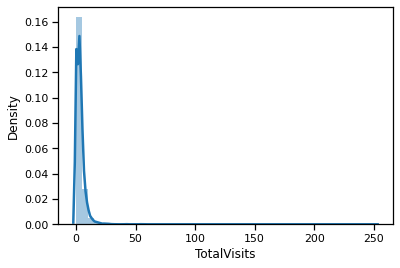

In [550]:
sns.distplot(lead_df["TotalVisits"])
print(lead_df["TotalVisits"].skew())
print(lead_df["TotalVisits"].kurt())

1. Mean imputation works better if the distribution is normally-distributed or has a Gaussian distribution 
2. while median imputation is preferable for skewed distribution(be it right or left)
3. thats why we are going to replaced null values with mode
4. as values are lies betwen 0-less than 50 so that we will replace it with mode

In [551]:
lead_df["TotalVisits"]=lead_df["TotalVisits"].fillna(lead_df["TotalVisits"].mode()[0])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.9564501929530472
-0.4037697307931065


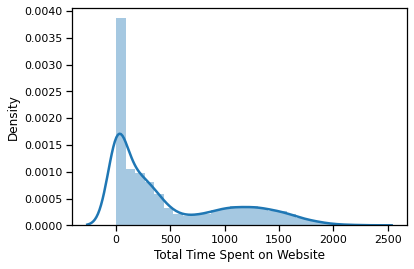

In [552]:
sns.distplot(lead_df["Total Time Spent on Website"])
print(lead_df["Total Time Spent on Website"].skew())
print(lead_df["Total Time Spent on Website"].kurt())

1. here skewness is near to 0 that means it is normally distributed
2. however there are some outlier are present in it
3. but we can replace null value with mean

In [553]:
lead_df["Total Time Spent on Website"]=lead_df["Total Time Spent on Website"].fillna(lead_df["Total Time Spent on Website"].mean())

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


2.871792896566408
42.36234824093768


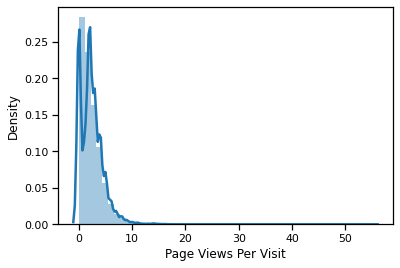

In [554]:
sns.distplot(lead_df["Page Views Per Visit"])
print(lead_df["Page Views Per Visit"].skew())
print(lead_df["Page Views Per Visit"].kurt())

1. here also it is positively skewed
2. we can replace this null value with median

In [555]:
lead_df["Page Views Per Visit"]=lead_df["Page Views Per Visit"].fillna(lead_df["Page Views Per Visit"].median())

In [556]:
lead_df.isna().sum()

Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

#Finding Outlier

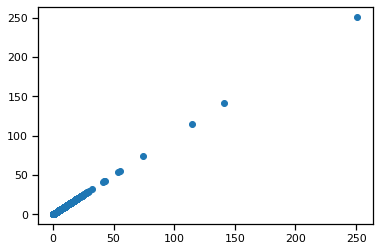

In [557]:
fig, ax = plt.subplots()
ax.scatter(lead_df['TotalVisits'], lead_df['TotalVisits'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fccc224d040>,
 'caps': [<matplotlib.lines.Line2D at 0x7fccc224d700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fccc22bdca0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fccc224ddc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fccc2257100>],
 'means': []}

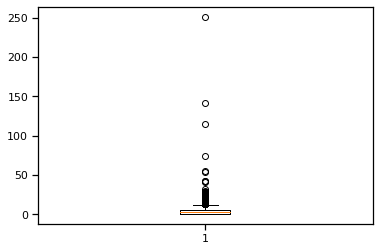

In [558]:
plt.boxplot(x=lead_df['TotalVisits'])

In [559]:
IQR1 = np.percentile(lead_df['TotalVisits'],75)-np.percentile(lead_df['TotalVisits'],25) #upper and lower limit (Q3=Q1)

upper_threshold=np.percentile(lead_df['TotalVisits'],75)+1.5*IQR1
lower_threshold=np.percentile(lead_df['TotalVisits'],25)-1.5*IQR1

print("upper_threshold :",upper_threshold)
print("lower_threshold :",lower_threshold)


upper1=np.where([lead_df['TotalVisits']>upper_threshold])

lower1=np.where([lead_df['TotalVisits']<lower_threshold])

upper_threshold : 12.5
lower_threshold : -7.5


In [560]:
lead_df=lead_df.drop(lead_df[(lead_df['TotalVisits']>upper_threshold)].index)

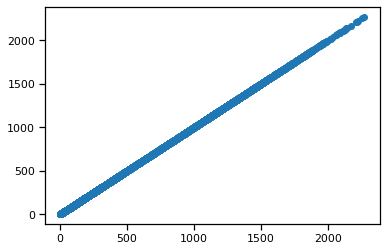

In [561]:
fig, ax = plt.subplots()
ax.scatter(lead_df['Total Time Spent on Website'], lead_df['Total Time Spent on Website'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fccc21eeb20>,
 'caps': [<matplotlib.lines.Line2D at 0x7fccc21fb220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fccc21ee7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fccc21fb910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fccc21fbc10>],
 'means': []}

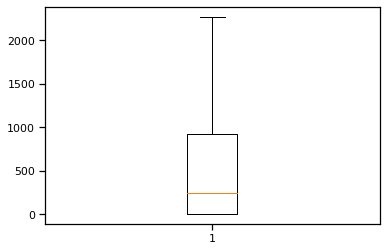

In [562]:
plt.boxplot(x=lead_df['Total Time Spent on Website'])

In [563]:
IQR2 = np.percentile(lead_df['Total Time Spent on Website'],75)-np.percentile(lead_df['Total Time Spent on Website'],25) #upper and lower limit (Q3=Q1)

upper_threshold=np.percentile(lead_df['Total Time Spent on Website'],75)+1.5*IQR2
lower_threshold=np.percentile(lead_df['Total Time Spent on Website'],25)-1.5*IQR2

print("upper_threshold :",upper_threshold)
print("lower_threshold :",lower_threshold)


upper2=np.where([lead_df['Total Time Spent on Website']>upper_threshold])

lower2=np.where([lead_df['Total Time Spent on Website']<lower_threshold])

upper_threshold : 2298.875
lower_threshold : -1368.125


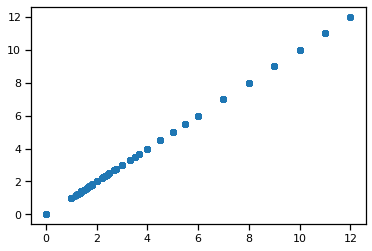

In [564]:
fig, ax = plt.subplots()
ax.scatter(lead_df['Page Views Per Visit'], lead_df['Page Views Per Visit'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fccc21242b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fccc2124970>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fccc2118f10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fccc212f070>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fccc212f370>],
 'means': []}

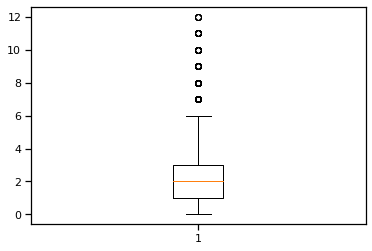

In [565]:
plt.boxplot(x=lead_df['Page Views Per Visit'])

In [566]:
IQR3 = np.percentile(lead_df['Page Views Per Visit'],75)-np.percentile(lead_df['Page Views Per Visit'],25) #upper and lower limit (Q3=Q1)

upper_threshold=np.percentile(lead_df['Page Views Per Visit'],75)+1.5*IQR3
lower_threshold=np.percentile(lead_df['Page Views Per Visit'],25)-1.5*IQR3

print("upper_threshold :",upper_threshold)
print("lower_threshold :",lower_threshold)


upper3=np.where([lead_df['Page Views Per Visit']>upper_threshold])

lower3=np.where([lead_df['Page Views Per Visit']<lower_threshold])


upper_threshold : 6.0
lower_threshold : -2.0


In [567]:
lead_df=lead_df.drop(lead_df[(lead_df['Page Views Per Visit']>upper_threshold)].index)

In [568]:
#lead_df['TotalVisits'].drop(upper1[0], inplace = True)
#lead_df['TotalVisits'].drop(lower1[0], inplace = True)

In [569]:
#lead_df['Total Time Spent on Website'].drop(upper2[0], inplace = True)
#lead_df['Total Time Spent on Website'].drop(lower2[0], inplace = True)

In [570]:
#lead_df['Page Views Per Visit'].drop(upper3[0], inplace = True)
#lead_df['Page Views Per Visit'].drop(lower3[0], inplace = True)

1. Here all outlier are deleted and also null values are replaced no our data is cleared

In [571]:
lead_df.shape

(8719, 12)

In [572]:
lead_df.isna().sum()

Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [573]:
lead_df.info(())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8719 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8719 non-null   object 
 1   Lead Source                             8719 non-null   object 
 2   Converted                               8719 non-null   int64  
 3   TotalVisits                             8719 non-null   float64
 4   Total Time Spent on Website             8719 non-null   int64  
 5   Page Views Per Visit                    8719 non-null   float64
 6   Last Activity                           8719 non-null   object 
 7   Specialization                          8719 non-null   object 
 8   Tags                                    8719 non-null   object 
 9   City                                    8719 non-null   object 
 10  A free copy of Mastering The Interview  8719 non-null   obje

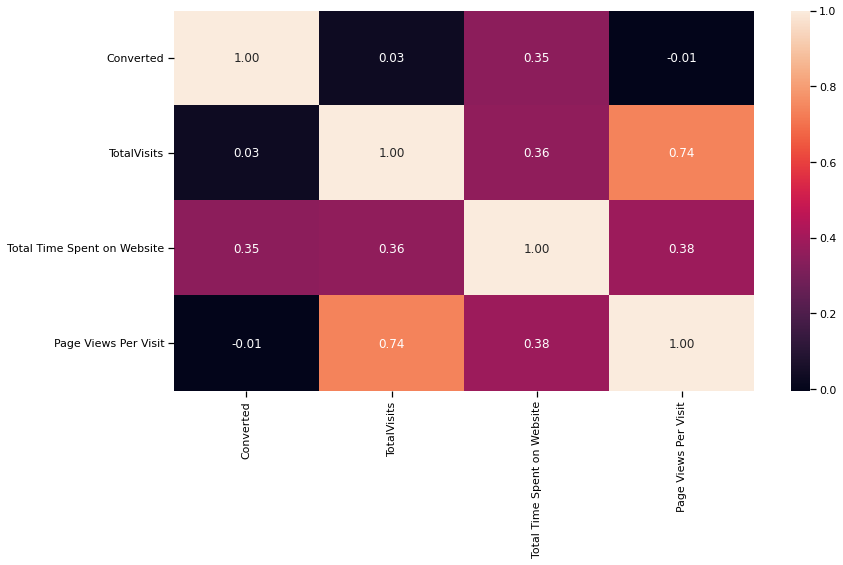

In [574]:
import seaborn as sns
corr = lead_df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=0)

In [575]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8719 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8719 non-null   object 
 1   Lead Source                             8719 non-null   object 
 2   Converted                               8719 non-null   int64  
 3   TotalVisits                             8719 non-null   float64
 4   Total Time Spent on Website             8719 non-null   int64  
 5   Page Views Per Visit                    8719 non-null   float64
 6   Last Activity                           8719 non-null   object 
 7   Specialization                          8719 non-null   object 
 8   Tags                                    8719 non-null   object 
 9   City                                    8719 non-null   object 
 10  A free copy of Mastering The Interview  8719 non-null   obje

#Univarient Analysis

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


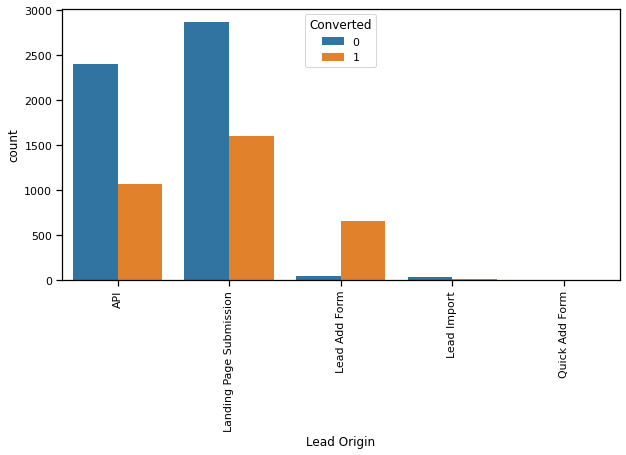

In [576]:
plt.figure(figsize=(10,5))
s1=sns.countplot(lead_df["Lead Origin"], hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


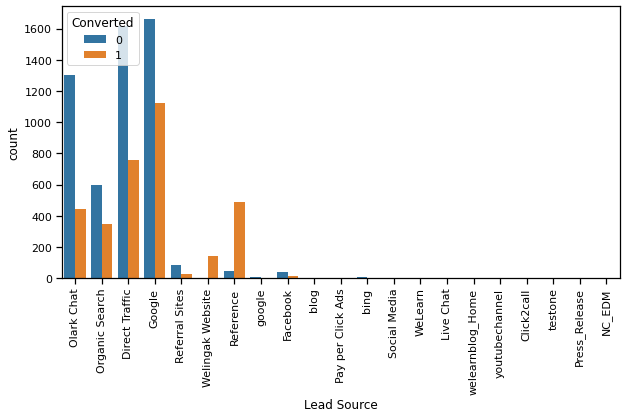

In [577]:
plt.figure(figsize=(10,5))
s1=sns.countplot(lead_df["Lead Source"], hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


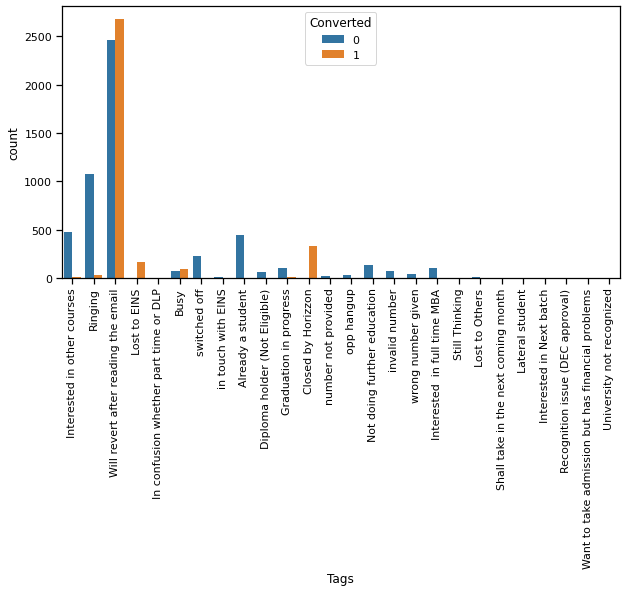

In [578]:
plt.figure(figsize=(10,5))
s1=sns.countplot(lead_df["Tags"], hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [579]:
#cat_features=lead_df[['Lead Origin','Lead Source','Last Activity','Specialization','Tags','City','A free copy of Mastering The Interview','Last Notable Activity']]

In [580]:
lead_df=pd.get_dummies(lead_df)

In [581]:
lead_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [582]:
x=lead_df.drop('Converted',axis=1)

In [583]:
y=lead_df['Converted']

In [584]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [585]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2998,3.0,361,1.5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4013,0.0,0,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7615,2.0,148,2.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5199,4.0,824,4.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3936,3.0,1218,1.5,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [586]:
X_train.shape

(6539, 115)

In [587]:
y_train.shape

(6539,)

In [588]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


In [589]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression()  
model=classifier.fit(X_train, y_train)  

In [590]:
y_pred=model.predict(X_test)

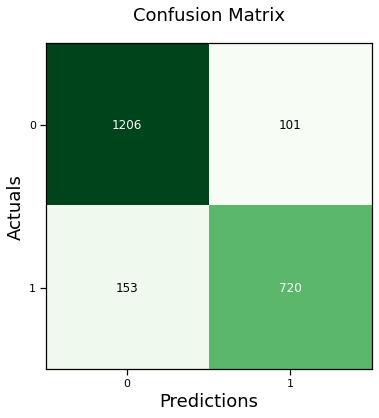

In [591]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [592]:
accuracy_score(y_pred,y_test)

0.8834862385321101

#Finding out the coeficeint of each feature so that we can find importance of features

In [593]:
Coeficient = pd.DataFrame(data={
    'Column Name': list(x.columns),
    'Coeficient': model.coef_[0]
})
Coeficient = Coeficient.sort_values(by='Coeficient', ascending=False)

In [594]:
Coeficient.head(20)

,Column Name,Coeficient
67,Tags_Closed by Horizzon,1.365663
1,Total Time Spent on Website,1.126329
84,Tags_Will revert after reading the email,0.896365
75,Tags_Lost to EINS,0.863585
111,Last Notable Activity_SMS Sent,0.761542
5,Lead Origin_Lead Add Form,0.759451
41,Last Activity_SMS Sent,0.247067
6,Lead Origin_Lead Import,0.242197
22,Lead Source_Welingak Website,0.233986
56,Specialization_Marketing Management,0.219450


1. Which are the top three variables in your model which contribute most towards the probability of a lead getting converted?

In [595]:
top_3={'Tags':1.336392, 'Total Time Spent on Website':1.181090, 'Lead Origin':0.783084,}
Atributes = list(top_3.keys())
Importance = list(top_3.values())

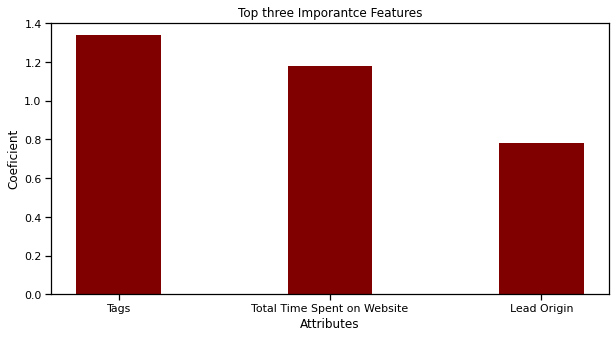

In [596]:
fig = plt.figure(figsize = (10, 5))
plt.bar(Atributes, Importance, color ='maroon',
        width = 0.4)
plt.xlabel("Attributes")
plt.ylabel("Coeficient")
plt.title("Top three Imporantce Features")
plt.show()

2. Which are the top three variables in your model which contribute most towards the probability of a lead getting converted?

In [597]:
top_3={'Tags : Closed by Horizzon':1.336392, 'Lead Origin : Lead Add Form':0.783084, 'Last Notable Activity : SMS Sent':0.686017,}
Atributes = list(top_3.keys())
Importance = list(top_3.values())


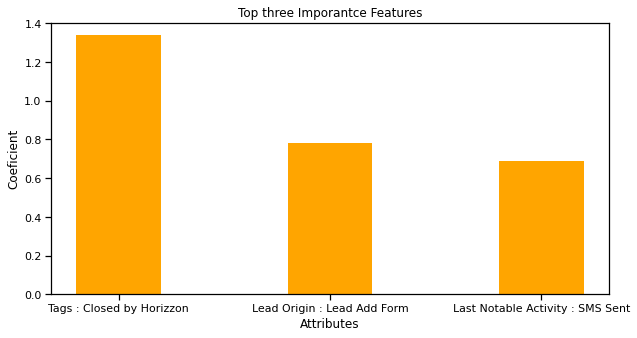

In [598]:
fig = plt.figure(figsize = (10, 5))
plt.bar(Atributes, Importance, color ='orange',
        width = 0.4)
plt.xlabel("Attributes")
plt.ylabel("Coeficient")
plt.title("Top three Imporantce Features")
plt.show()

In [599]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1307
           1       0.88      0.82      0.85       873

    accuracy                           0.88      2180
   macro avg       0.88      0.87      0.88      2180
weighted avg       0.88      0.88      0.88      2180



In [600]:
X_train.shape

(6539, 115)

In [601]:
y_train.shape

(6539,)

In [602]:
prob=pd.DataFrame(model.predict_proba(X_test))

In [603]:
prob

,0,1
0,0.431928,0.568072
1,0.989317,0.010683
2,0.103084,0.896916
3,0.011476,0.988524
4,0.995932,0.004068
...,...,...
2175,0.750911,0.249089
2176,0.999677,0.000323
2177,0.997526,0.002474
2178,0.864467,0.135533


In [604]:
prob=prob.drop(0,axis=1)

In [605]:
prob['Lead Scpore']=prob*100

In [606]:
prob['Converted']=y_pred

In [607]:
prob.head()

,1,Lead Scpore,Converted
0,0.568072,56.807170,1
1,0.010683,1.068272,0
2,0.896916,89.691576,1
3,0.988524,98.852404,1
4,0.004068,0.406832,0


In [656]:
fp=pd.DataFrame(y_test)

In [657]:
fp["pred"]=y_pred

In [658]:
fp.head()

,Converted,pred
708,0,1
5565,0,0
2856,1,1
7496,1,1
2625,0,0


In [687]:
fp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2180 entries, 708 to 1197
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Converted  2180 non-null   int64
 1   pred       2180 non-null   int64
 2   Con        2180 non-null   bool 
dtypes: bool(1), int64(2)
memory usage: 117.8 KB


In [697]:
np.logical_and(y_pred,y_test)

708     False
5565    False
2856     True
7496     True
2625    False
        ...  
2252    False
8847    False
5257    False
7562    False
1197    False
Name: Converted, Length: 2180, dtype: bool